In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt

In [59]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [60]:
y_train, y_test= y_train.reshape(-1,),y_test.reshape(-1,)

In [11]:
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
def plotting(x,y,idx):
    plt.figure(figsize=(10,2))
    plt.imshow(x[idx])
    plt.xlabel(labels[y[idx]])

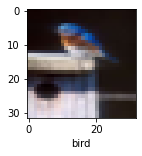

In [16]:
plotting(x_train, y_train,13)

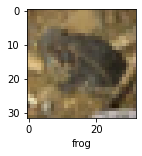

In [17]:
plotting(x_train, y_train,23)

## Normalize data

In [61]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

## Simple ANN

In [22]:
ann=models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
50000/50000 [==============================] - 84s 2ms/sample - loss: 2.3008 - acc: 0.1285
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 2.2997 - acc: 0.1370
Epoch 3/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 2.2990 - acc: 0.1441
Epoch 4/5
50000/50000 [==============================] - 92s 2ms/sample - loss: 2.2980 - acc: 0.1530
Epoch 5/5
50000/50000 [==============================] - 93s 2ms/sample - loss: 2.2970 - acc: 0.1560


In [23]:
ann.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 423us/sample - loss: 2.2960 - acc: 0.1460


[2.2960484222412108, 0.146]

In [24]:
y_pred_ann=ann.predict(x_test)

array([3, 8, 8, 0, 6])

In [25]:
y_pred_ann[:5]

array([[0.09722502, 0.09815677, 0.09995966, 0.10295487, 0.09983345,
        0.09965426, 0.10137182, 0.09964436, 0.09969203, 0.1015078 ],
       [0.1005611 , 0.09835131, 0.09918122, 0.10058613, 0.09765215,
        0.0976363 , 0.09804966, 0.09852973, 0.10378772, 0.10566465],
       [0.09937973, 0.09823947, 0.09932699, 0.10138735, 0.09810856,
        0.09809899, 0.09878233, 0.09892398, 0.10297894, 0.10477363],
       [0.10027252, 0.09786909, 0.09960458, 0.10118367, 0.09841614,
        0.0981235 , 0.09868359, 0.09879711, 0.10312116, 0.10392861],
       [0.09666112, 0.09797617, 0.10000119, 0.10323047, 0.10036396,
        0.10021091, 0.10194047, 0.09980704, 0.09891447, 0.10089426]],
      dtype=float32)

In [28]:
import pandas as pd
import numpy as np

In [29]:
predict_ann=[np.argmax(i) for i in y_pred_ann]
predict_ann[:5]

[3, 9, 9, 9, 3]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6])

In [41]:
table=pd.DataFrame({'Actual':y_test,'Predict':predict_ann})
table.head()

,Actual,Predict
0,3,3
1,8,9
2,8,9
3,0,9
4,6,3


In [44]:
cm=tf.math.confusion_matrix(y_test, predict_ann)
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(cm,feed_dict=None, session=None))

Confusion Matrix: 

 [[  1   0   0 215   0   0   0   0   1 783]
 [  0   0   0 441   0   0   0   0   0 559]
 [  0   0   0 588   0   0   0   0   0 412]
 [  0   0   0 662   0   0   0   0   0 338]
 [  0   0   0 727   0   0   0   0   0 273]
 [  0   0   0 702   0   0   0   0   0 298]
 [  0   0   0 740   0   0   0   0   0 260]
 [  0   0   0 511   0   0   0   0   0 489]
 [  0   0   0 225   0   0   0   0   1 774]
 [  0   0   0 203   0   0   0   0   1 796]]


In [ ]:
#bad at image classification

## Using CNN

In [62]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [63]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [64]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 31s 625us/sample - loss: 1.4441 - acc: 0.4813
Epoch 2/10
50000/50000 [==============================] - 29s 580us/sample - loss: 1.0934 - acc: 0.6140
Epoch 3/10
50000/50000 [==============================] - 30s 597us/sample - loss: 0.9651 - acc: 0.6621
Epoch 4/10
50000/50000 [==============================] - 31s 618us/sample - loss: 0.8815 - acc: 0.6915
Epoch 5/10
50000/50000 [==============================] - 32s 640us/sample - loss: 0.8159 - acc: 0.7156
Epoch 6/10
50000/50000 [==============================] - 32s 639us/sample - loss: 0.7544 - acc: 0.7364
Epoch 7/10
50000/50000 [==============================] - 32s 642us/sample - loss: 0.7064 - acc: 0.7532
Epoch 8/10
50000/50000 [==============================] - 32s 640us/sample - loss: 0.6570 - acc: 0.7691
Epoch 9/10
50000/50000 [==============================] - 32s 647us/sample - loss: 0.6126 - acc: 0.7856
Epoch 10/10
50000/50000 [==============================] - 33s 6

In [66]:
cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 225us/sample - loss: 0.9621 - acc: 0.6924


[0.9621024419784546, 0.6924]

In [67]:
y_pred_cnn=cnn.predict(x_test)

In [68]:
predict_cnn=[np.argmax(i) for i in y_pred_cnn]

In [69]:
predict_cnn[:5]

[3, 8, 1, 0, 4]

## Making prediction

In [70]:
def predict(idx):
    plt.figure(figsize=(13,2))
    plt.imshow(x_test[idx])
    print('Actual:%s' %(labels[y_test[idx]]))
    print('Predict:%s' %(labels[predict_cnn[idx]]))

Actual:horse
Predict:horse


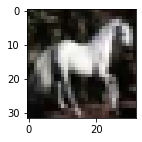

In [71]:
predict(13)

Actual:frog
Predict:frog


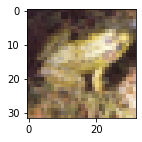

In [72]:
predict(19)

Actual:airplane
Predict:airplane


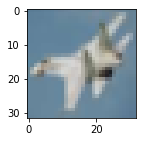

In [73]:
predict(10)